In [101]:
from argparse import ArgumentParser, Namespace
import yaml
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

def main(args, config):

    train_log = config['analysis'].split(".")[0]+"_train.csv"
    eval_log = config['analysis'].split(".")[0]+"_eval.csv"

    train = pd.read_csv(train_log)
    eval = pd.read_csv(eval_log)

    fig, ax = plt.subplots(figsize=(10, 6))
    # train.plot(ylim = (0.75, 1), xlim = (0,60), kind='line', grid = True, ax = ax)
    train.plot(ylim = (0.75, 1), xlim = (0,600), kind='line', grid = True, ax = ax)
    # eval.plot(ylim = (0.75, 1), xlim = (0,400), kind='line', grid = True, ax = ax)
    # Set grid and major tick interval to 10 for both x and y axes
    ax.xaxis.set_major_locator(MultipleLocator(15))
    ax.yaxis.set_major_locator(MultipleLocator(0.01))
    
    # Set grid spacing to 10 for both x and y axes
    ax.tick_params(axis='y', labelsize=7)
    ax.tick_params(axis='x', labelsize=7)

    ax.axhline(y=0.95, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=0.96, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=0.97, color='black', linestyle='--', linewidth=1)
    ax.axhline(y=0.99, color='black', linestyle='--', linewidth=1)


    # Remove the x-axis label
    plt.show()
    # print(eval.plot(ylim = (0.75, 1)))

    

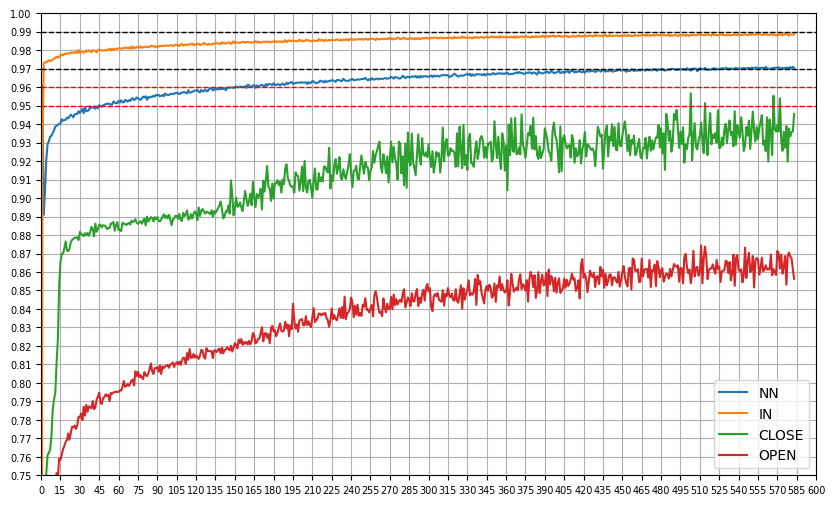

In [102]:
if __name__ == "__main__":
    args = Namespace(
        # yaml_path = "/home/hyohyeongjang/2024SWELL/codes/v2_config.yaml",
        # yaml_path = "/home/hyohyeongjang/2024SWELL/codes/v3_config.yaml",
        yaml_path = "/home/hyohyeongjang/2024SWELL/codes/v5_config.yaml",
    )
    
    with open(args.yaml_path, 'r') as file:
        yaml_config = yaml.safe_load(file)
    
    #dictionary type string to dictionary
    # yaml_config['dataStats']['labelToId'] = eval(yaml_config['dataStats']['labelToId'])
    # yaml_config['dataStats']['labelToId'] = {"'"+"'" if key == "'" else key : value for key, value in yaml_config['dataStats']['labelToId'].items()}
    # yaml_config['dataStats']['idToLabel'] = {value: key for key, value in yaml_config['dataStats']['labelToId'].items()}
    yaml_config['analysis_pos'] = {"'"+"'" if key == "'" else key : value for key, value in yaml_config['analysis_pos'].items()}
    
    main(args, yaml_config)